#LGMVIP September 2021 Task # 2

 **Prediction Using Decision Tree Algorithm**

In this Task, I have created an Iris dataset Classification model using Decision Tree.










##Author: Ashina Sadiq


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1.	Importing libraries and packages 


In [2]:
import numpy as np # Numpy for mathematical operations on data
import pandas as pd # Pandas for data manipulation
import matplotlib.pyplot as plt # Matplotlib for data visualization
from sklearn.model_selection import train_test_split # train_test_split for splitting dataset
from sklearn.tree import DecisionTreeClassifier # Decision Tree model importing
from sklearn.metrics import classification_report # classification_report to show confusion matrix result
import sklearn.metrics as metrics # Model evaluation Libraries

# 2.	Importing dataset and applying appropriate transformation


In [5]:
# Importing dataset
df=pd.read_csv('/content/drive/MyDrive/Dataset/Iris.csv')
print("Dataset is imported successfully")

Dataset is imported successfully


In [6]:
# Printing first 5 records
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# Printing last 5 records
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
# Shape of dataset
df.shape

(150, 6)

In [9]:
# Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
# Statistical Description of dataset
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
# Checking the dataset if any missing value available
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# 3. Some important Visualizations

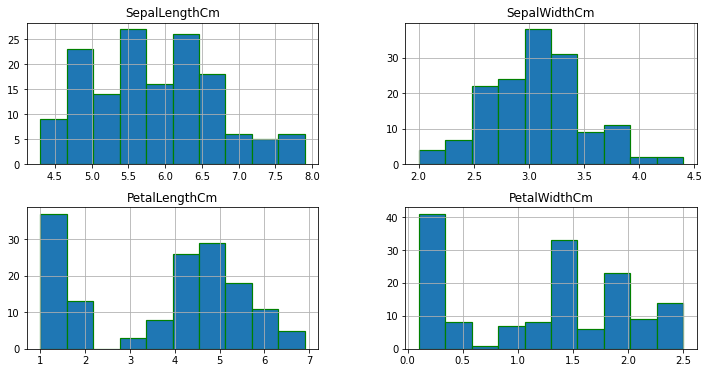

In [12]:
# The Histogram representation of the univariate plots for each measurement

np = df.drop('Id', axis=1) # dropping the Id 
np.hist(edgecolor='green', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


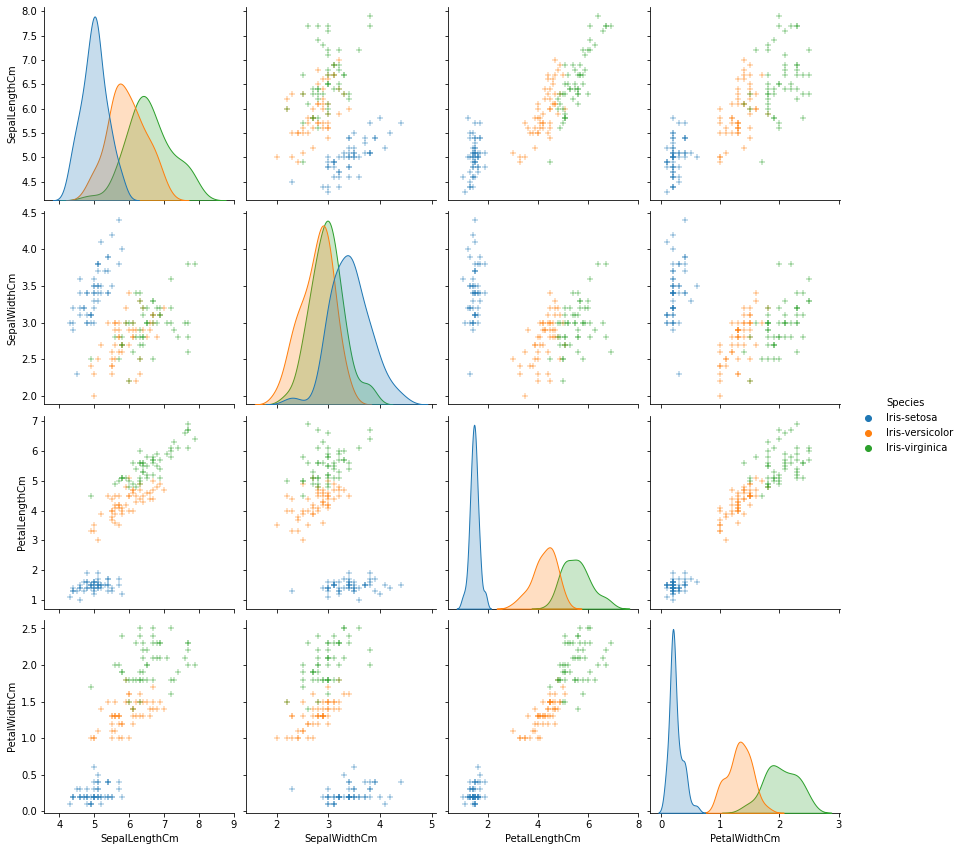

In [13]:
# Using seaborn pairplot to see the bivariate relation between each pair of features

import seaborn as sns

nl = df.drop('Id', axis=1) # dropping the Id 
b = sns.pairplot(nl,hue="Species",diag_kind="kde", markers='+',size =3 );
plt.show()

# 4. Extracting Independent and dependent Variables

In [25]:
feature_cols=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x=df[feature_cols]
y=df.Species

In [26]:
x # To check input data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [27]:
y # To check output data

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

# 5.	Splitting dataset into training and testing


In [28]:
# Splitting dataset into training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=101)

In [29]:
# Model Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

# 6.	Training the model using logistic regression

In [30]:
# Model Training

model = DecisionTreeClassifier() 
model.fit(x_train, y_train) 
print("Training completed.")

Training completed.


# 7.	Prediction and evaluation of results

In [31]:
# Result prediction
y_pred=model.predict(x_test)

In [32]:
# Clasificatio report
print(classification_report(y_test,y_pred)) 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.92      1.00      0.96        12
 Iris-virginica       1.00      0.88      0.93         8

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [33]:
# Confusion matrix
mat=metrics.confusion_matrix(y_test,y_pred)
print(mat)

[[10  0  0]
 [ 0 12  0]
 [ 0  1  7]]


In [39]:
# Checking model accuracy
accuracy=metrics.accuracy_score(y_test,y_pred)
print(accuracy)

0.9666666666666667


# 8. Result Visualization

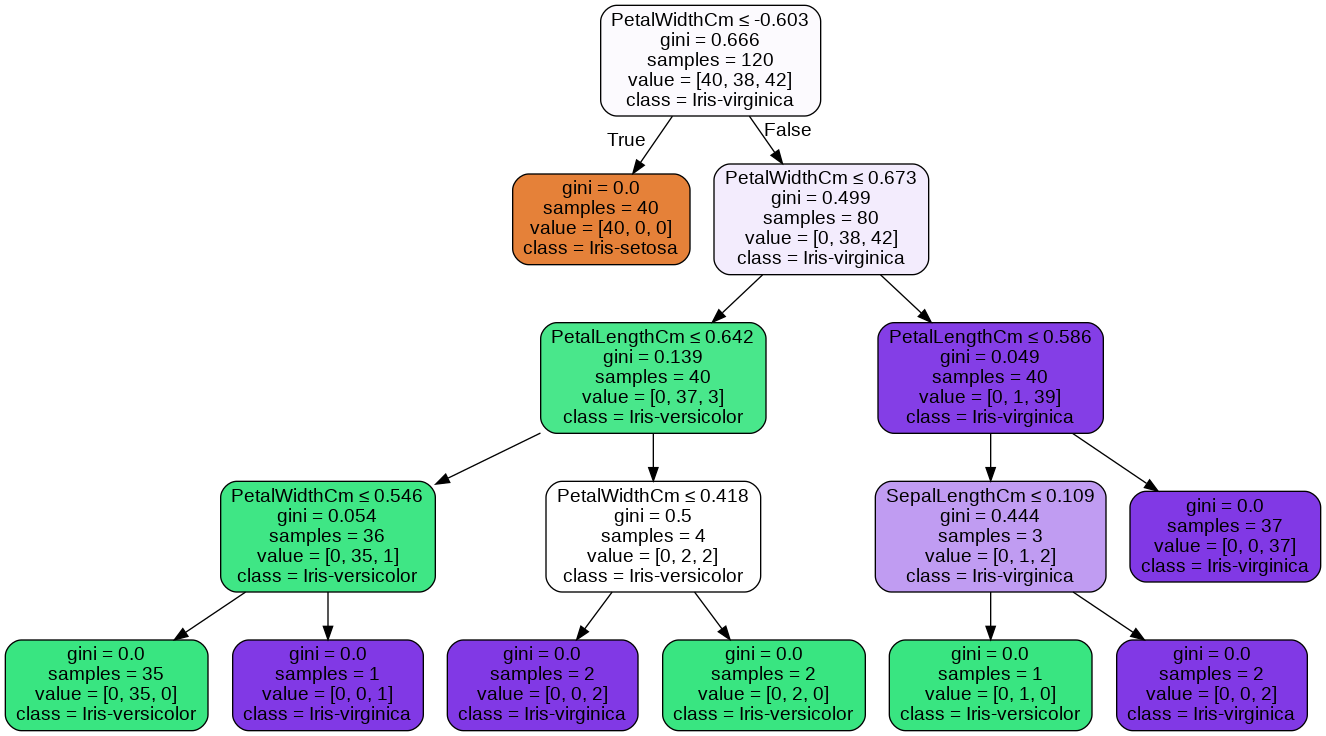

In [38]:
feature_cols =[ 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'] # Tree Representation 
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
import pydotplus
from IPython.display import Image  

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())